# Communicate Data findings Project - Nawaf alhajri

## Introduction:

   **I have chose Ford GoBike Dataset to apply the knowledge on it.   
   We don't have some sharing bikes system like this but in fueture may we need some systems and services like this.**

   **This dataset describe the data of a public bicycle sharing system called Ford GoBike contains several details about each trip on the bike such as start_station and the duration of the trip.**

### Loading the data:

In [1]:
#loading library 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read and load data
df_bike = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
# check head of data
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# check info all columns
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# how many null i have 
df_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

- i have some null here , i will drop all null values

In [6]:
# drop null values
df_bike.dropna(inplace=True)

In [7]:
# how many null i have now - check 
df_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [8]:
#check duplicated 
df_bike.duplicated().sum()

0

In [9]:
# describe the data
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [10]:
#check value counts in gender
df_bike['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [11]:
#check value counts in user type
df_bike['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [12]:
# change start_time and end_time to datetime format

df_bike.start_time = pd.to_datetime(df_bike.start_time)
df_bike.end_time = pd.to_datetime(df_bike.end_time)


In [13]:
# check info 
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [14]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [15]:
# Calculate member_age from member_birth_year.
df_bike['age']= 2019-df_bike['member_birth_year']

In [16]:
# change age and birthyear to int Type
df_bike['age']=df_bike['age'].astype(int)
df_bike['member_birth_year']=df_bike['member_birth_year'].astype(int)


In [17]:
# check info 
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [18]:
# check head of data
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60


- We can see that there are some issues in type of time and we can generate the days of each trip from it

In [19]:
# exctract from datetime the day
dayOfWeek={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df_bike['Day_of_trip'] = df_bike['start_time'].dt.dayofweek.map(dayOfWeek)

In [20]:
# check in list of weekday is weekend or no 
listOfWeekday = ['Mon','Tue','Wed','Thu','Fri']
df_bike['Weekend'] = df_bike['Day_of_trip'].apply(lambda x: 0 if x in listOfWeekday else 1)

In [21]:
# check head of data
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,Day_of_trip,Weekend
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35,Thu,0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47,Thu,0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30,Thu,0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,Thu,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,Thu,0


In [22]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

## What is the structure of your dataset?

>The structure of the dataset contains 18 columns or variables,
   some of them are from the source while there are 3 columns are generated based on other columns:
   

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- start_station_longitude
- bike_id 
- user_type
- member_birth_year
- bike_share_for_all_trip
- age
- Day_of_trip
- Weekend 

> The dataset was further enhanced with features that I may find neccessary to perform interesting analysis:

- customer: age
- Weekend : is weekend or not
- Day_of_trip : weekday 


### What is/are the main feature(s) of interest in your dataset?

>I am interested in investigate duration of biking time, The days of which have many trips and also about the stations and trips if that were in weekends or not? 
and which type of customer have been used this service more than the other, i.e. who have many trips subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  I think that these features will help me a lot  
   - Trip Duration(min)
   - User Type
   - Weekend
   - WeekDay
   - Start Station Name
   - End Station Name
   - member_gender
   - Age 

<hr>

## Univariate Exploration

In [23]:
# convert duration to minutes instead of seconds.
df_bike['duration_min'] = df_bike['duration_sec']/60
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [24]:
# check head data 
df_bike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,Day_of_trip,Weekend,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35,Thu,0,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47,Thu,0,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30,Thu,0,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,Thu,0,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,Thu,0,29.883333


investigating distributions of individual variables.

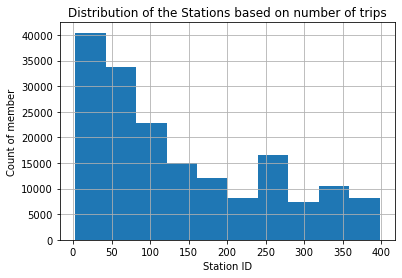

In [25]:
# plot histogram for start station ID column
df_bike.hist(column='start_station_id')
plt.ylabel('Count of member');
plt.xlabel('Station ID');
plt.title('Distribution of the Stations based on number of trips');

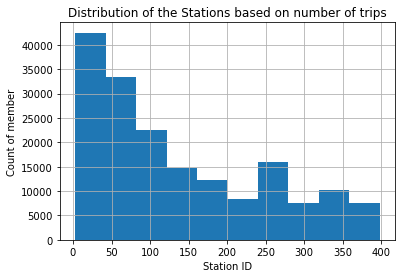

In [26]:
# plot histogram for end station ID column

df_bike.hist(column='end_station_id')
plt.ylabel('Count of member'); 
plt.xlabel('Station ID'); 
plt.title('Distribution of the Stations based on number of trips');

> we can see that stations ID between 0 - 120 has most number of trips that were taken.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


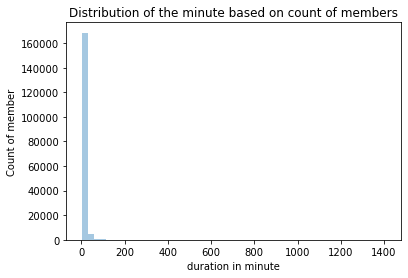

In [27]:
#plot duration in min - column
sns.distplot(df_bike['duration_min'], kde=False);
plt.ylabel('Count of member');
plt.xlabel('duration in minute');
plt.title('Distribution of the minute based on count of members');

we want see now member Age

In [28]:
df_bike['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

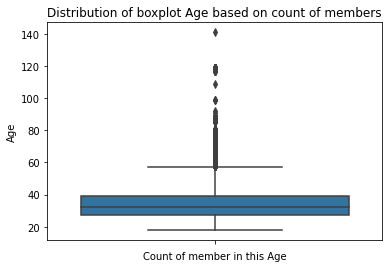

In [29]:
sns.boxplot(data= df_bike , y = 'age');
plt.ylabel('Age');
plt.xlabel('Count of member in this Age');
plt.title('Distribution of boxplot Age based on count of members');

In [30]:
# Let's remove outliers. Only keep record with age below 60.
df_bike = df_bike[df_bike['age'] <= 60]

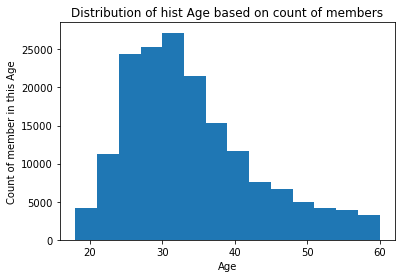

In [45]:
binsize = 3
bins = np.arange(18, df_bike['age'].max()+binsize, binsize)
plt.hist(data = df_bike, x = 'age', bins = bins);
plt.ylabel('Count of member in this Age');
plt.xlabel('Age');
plt.title('Distribution of hist Age based on count of members');

**look is better now without outliers**

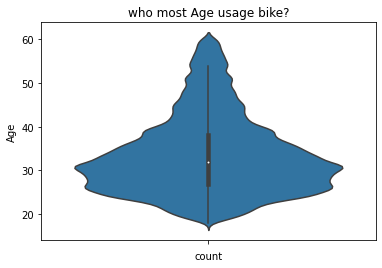

In [32]:
sns.violinplot(data = df_bike, y = 'age');
plt.ylabel('Age');
plt.xlabel('count');
plt.title('who most Age usage bike?');

>The data is not distributed evenly. There are many bikers are around age 30. There are not that many bikers above age 40.


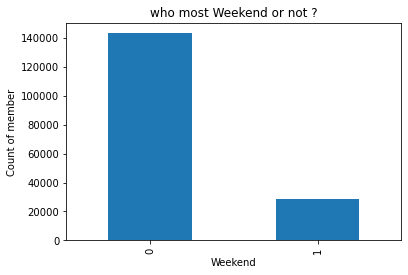

In [33]:
# plot bar for value counts weekend
df_bike['Weekend'].value_counts().plot(kind='bar');
plt.ylabel('Count of member');
plt.xlabel('Weekend'); 
plt.title('who most Weekend or not ?');

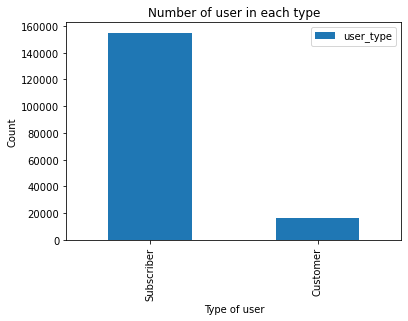

In [34]:
# plot bar for value counts user_type

df_bike['user_type'].value_counts().plot(kind='bar');
plt.ylabel('Count');
plt.xlabel('Type of user'); 
plt.title('Number of user in each type');
plt.legend(loc="upper right")

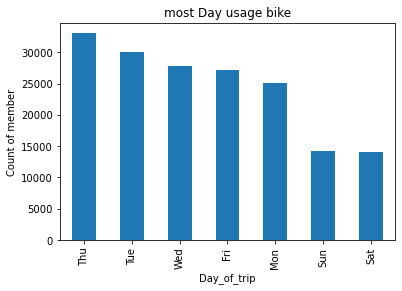

In [35]:
# plot bar for value counts Day_of_trip

df_bike['Day_of_trip'].value_counts().plot(kind='bar');
plt.ylabel('Count of member');
plt.xlabel('Day_of_trip'); 
plt.title('most Day usage bike');


> Most of the utilizaion of the bikes were in the weekdays

> and most of ride is subscriber may because use to go work or school

In [36]:
# store  value counts  in to virable s , e
s=df_bike['start_station_name'].value_counts().sample(7)
e=df_bike['end_station_name'].value_counts().sample(7)


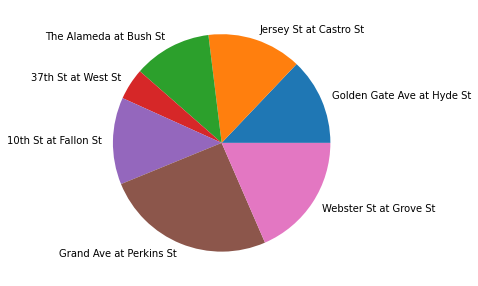

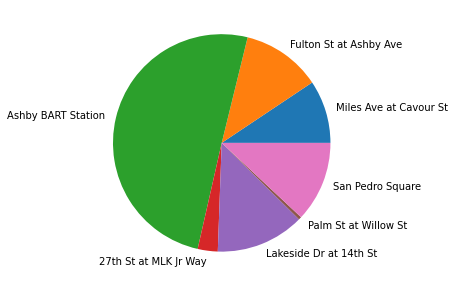

In [37]:
plt.figure(figsize=(5,5))

plt.pie(s,labels = s.index);

plt.figure(figsize=(5,5))

plt.pie(e,labels = e.index);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

   > yes  , i remove the age outliers above 60 .

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>Yes we saw that age was not in good distribution and it had many outliers spersted in big range of the concentrated data, and I tried to solve it and i think i did it well.

<hr>

In [38]:
base_color=sns.color_palette()[0]

##  Bivariate Exploration

How does the trip duration distribution vary by gender member ?

No handles with labels found to put in legend.


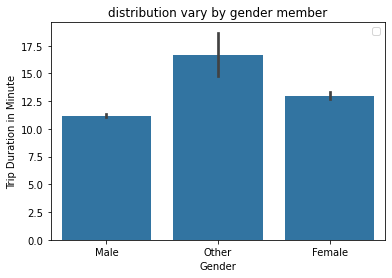

In [39]:
sns.barplot(data=df_bike, x='member_gender', y='duration_min', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');
plt.title("distribution vary by gender member")
plt.legend(loc="upper right")

> Though not a huge difference, male riders tend to have shorter trips compared to others gender  member 

Average Trip Duration on Weekdays

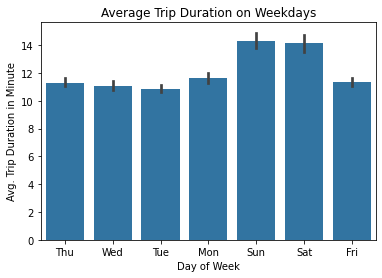

In [40]:
sns.barplot(data=df_bike, x='Day_of_trip', y='duration_min', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title("Average Trip Duration on Weekdays");


>The riding trips are much shorter on Monday through Friday compared to weekends. 

Weekly usage between User Type [ **subscribers and customers**]

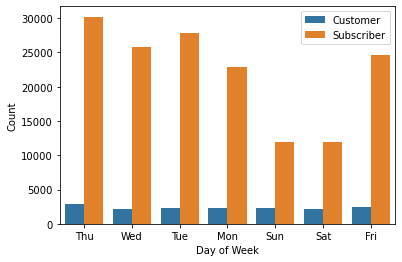

In [41]:
sns.countplot(data=df_bike, x='Day_of_trip', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.legend();

>There was much more subscriber usage than casual customers overall. Especially on weekdays, except for the weekend, there was a decrease 

<hr>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>I noticed that subscribers were present on weekdays more than customers, as customers rode bikes more on weekends than subscribers. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>yes , the minutes were more on weekends than on weekdays, and this indicates that weekdays are not used for entertainment, either to go to work or to school .

<hr>

## Multivariate Exploration

How does the average trip duration vary in weekdays between customers and subscribers?

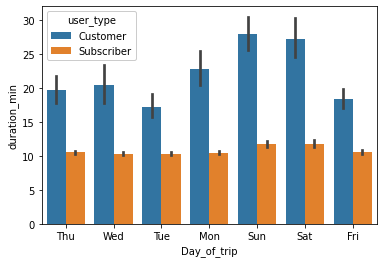

In [42]:
ax = sns.barplot(data = df_bike, x = 'Day_of_trip', y = 'duration_min', hue = 'user_type')
ax.legend(framealpha = 1, title = 'user_type')

>It is clear in the above representation that the subscribers drive for the shortest time while the customers are the more trips, and we also notice that the customers use them on the weekends with a large difference 

How does the duration_min usage vary during weekdays for member gender and what most dayes?

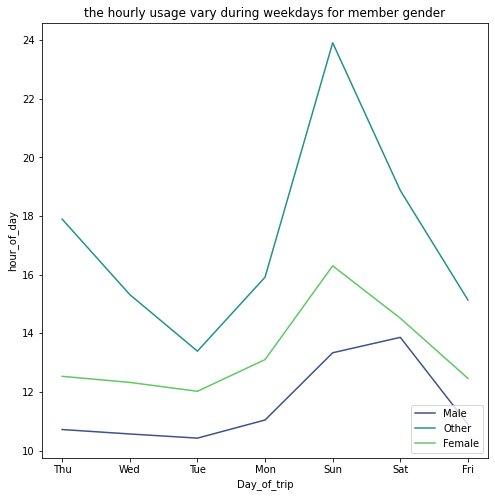

In [43]:
plt.figure(figsize=[8,8]);
ax = sns.lineplot(data = df_bike,x='Day_of_trip',y='duration_min',hue='member_gender',palette='viridis',ci=None);
plt.xlabel("Day_of_trip");
plt.ylabel("hour_of_day");
plt.title("the hourly usage vary during weekdays for member gender");
plt.legend(loc ="lower right");

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
>yes, the subscribers drive for the shortest time while the customers are the more trips, and we also notice that the customers use them on the weekends with a large difference 



### Were there any interesting or surprising interactions between features?

>Were there any interesting or surprising interactions between features? yes the all gender most usage in weekend , and the male usage shorter trip in duration while other gender usage smoetimes above 12 minutes

In [44]:
df_bike.to_csv('Master_cleand_GoBike.csv')

<hr>